# Homework 2

## Library and data imports

In [1]:
import numpy as np
import pandas as pd
import re
import text_processing
aiml_data = pd.read_csv('reddit_database.csv')
import statistics
from statistics import mode

None


## Data corrections

In [2]:
aiml_data['author_created_date'] = pd.to_datetime(aiml_data['author_created_utc'], unit = 's')
aiml_data['created_date'] = pd.to_datetime(aiml_data['created_date'])

## Q1.1

In [3]:
print(aiml_data['subreddit'].value_counts().head(5))

MachineLearning         122583
datascience              63237
statistics               62334
learnmachinelearning     42655
computerscience          38907
Name: subreddit, dtype: int64


## Q1.2

In [4]:
print(aiml_data['author'].value_counts().head(5))

[deleted]         24663
ai_jobs            6245
aijobs-com         3662
hadooparticles     3068
Yuqing7            2192
Name: author, dtype: int64


## Q1.3

In [5]:
print(aiml_data.groupby('subreddit')['author'].nunique().sort_values(ascending=False).head(5))

subreddit
MachineLearning    46920
statistics         32982
datascience        31436
computerscience    26200
AskStatistics      21692
Name: author, dtype: int64


## Q1.4

In [6]:
print((aiml_data.groupby('subreddit')['post'].apply(lambda x : x.notnull().mean()* 100).sort_values(ascending=False).head()))

subreddit
AskStatistics    87.004432
MLQuestions      85.831022
rstats           69.663495
kaggle           69.245648
datasets         67.672850
Name: post, dtype: float64


## Q2.1

[Text(0.5, 0, 'Time'),
 Text(0, 0.5, 'Number of Posts'),
 Text(0.5, 1.0, 'AI/ML Posts Over Time')]

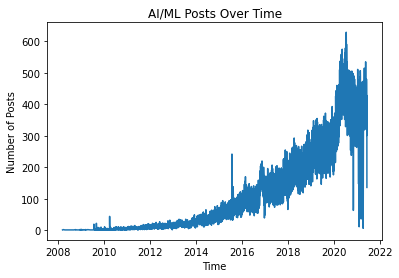

In [30]:
aiml_data['date'] = aiml_data['created_date'].dt.date
aiml_data['date'].value_counts().plot().set(xlabel='Time', ylabel='Number of Posts', title='AI/ML Posts Over Time')

## Q2.2

[Text(0.5, 0, 'Points'),
 Text(0, 0.5, 'Percentage of Posts in Point Range'),
 Text(0.5, 1.0, 'AI/ML Points Distribution')]

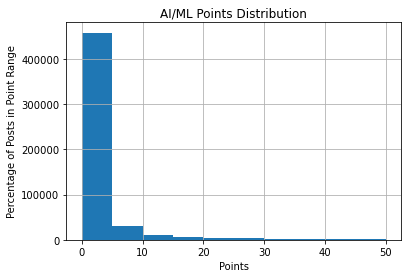

In [8]:
aiml_data['score'].hist(range=[0, 50]).set(xlabel='Points', ylabel='Percentage of Posts in Point Range', title='AI/ML Points Distribution')

## Q2.3

[Text(0.5, 0, 'Day Of The Week'),
 Text(0, 0.5, 'Total Number of Posts'),
 Text(0.5, 1.0, 'AI/ML Posts Per day of the Week')]

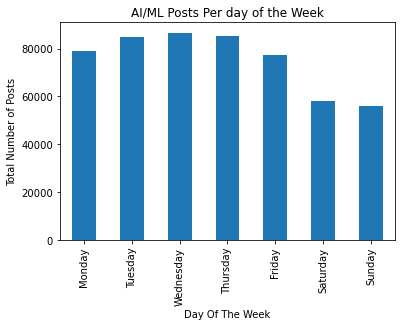

In [9]:
aiml_data['dow'] = aiml_data['created_date'].dt.day_name()
aiml_data['dow'] = pd.Categorical(aiml_data['dow'], categories= ['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],  ordered=True)
dow_plot = aiml_data.groupby('dow')['created_date'].count().plot(kind='bar')
dow_plot.set(xlabel='Day Of The Week', ylabel='Total Number of Posts', title='AI/ML Posts Per day of the Week')


## Q2.4

[Text(0.5, 0, 'Hour of Day'),
 Text(0, 0.5, 'Number of Posts'),
 Text(0.5, 1.0, 'AI/ML Posts Per Hour of Day')]

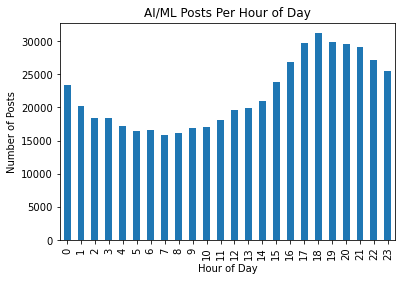

In [10]:
aiml_data['hod'] = aiml_data['created_date'].dt.hour
hod_plot = aiml_data.groupby('hod')['created_date'].count().plot(kind='bar')
hod_plot.set(xlabel='Hour of Day', ylabel='Number of Posts', title='AI/ML Posts Per Hour of Day')

## Q3.1

In [11]:
x = aiml_data.created_date.max().date()
thirty = aiml_data[aiml_data['created_date'] >= (pd.to_datetime(x) - pd.Timedelta(days=30))]
print(thirty['subreddit'].value_counts().head(5))

MachineLearning         2386
datascience             1401
statistics              1343
learnmachinelearning    1164
computerscience         1021
Name: subreddit, dtype: int64


## Q3.2

In [12]:
aiml_data['title_length'] = aiml_data['title'].apply(len)
correlation = aiml_data['title_length'].corr(aiml_data['score'])
if correlation < 0.7:
    print('There is weak to no correlation')
else:
    print('There is a strong correlation')

There is weak to no correlation


## Q3.3

In [13]:
print(aiml_data['title'].str.lower().str.split(expand=True).stack().value_counts().head(20))

to          133447
a           118002
for         103489
the         102750
in           96667
of           88673
and          82492
data         82203
with         55169
learning     52059
is           51314
how          50923
i            47298
on           45113
machine      35464
what         34946
-            31093
from         25752
you          25298
ai           23945
dtype: int64


## Q3.4

In [29]:
urls_list = aiml_data['post'].apply(text_processing.find_urls)
updated_list = []
for index, value in urls_list.items():
    if value != []:
        updated_list.append(value[0])
for i in range(10):
    mode = text_processing.most_frequent(updated_list)
    print(mode)
    for k in updated_list:
        if k == mode:
            updated_list.remove(k)    


https://www.reddit.com/r/datascience/wiki/frequently-asked-questions)
https://affportal.jaagnet.com/JAAGNet-Groups/DaisyMS-AI-Team-Group/blog/apple-details-ai-to-help-voice-assistants-recognize-hotwords-and-](https://affportal.jaagnet.com/JAAGNet-Groups/DaisyMS-AI-Team-Group/blog/apple-details-ai-to-help-voice-assistants-recognize-hotwords-and-)
https://stats.stackexchange.com/)
https://www.reddit.com/4qyjiq)
https://affportal.jaagnet.com/JAAGNet-Groups/DaisyMS-AI-Team-Group/blog/apple-details-ai-to-help-voice-assistants-recognize-hotwords-and-](https://affportal.jaagnet.com/JAAGNet-Groups/DaisyMS-AI-Team-Group/blog/apple-details-ai-to-help-voice-assistants-recognize-hotwords-and-)
https://fast.ai)
https://www.reddit.com/r/MachineLearning/comments/4qyjiq/machine_learning_wayr_what_are_you_reading_week_1/)
https://github.com/sepandhaghighi/pycm](https://github.com/sepandhaghighi/pycm)
https://github.com/rodrigobressan/face2data**](https://github.com/rodrigobressan/face2data)
https://dee